In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('../data/c4_general_cafeteria.csv', encoding='cp949')
df.head()

/var/folders/vm/5qmxs2qx4jqfzfp5dmt_3x900000gn/T/ipykernel_8596/1890198893.py:1: DtypeWarning: Columns (17,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/c4_general_cafeteria.csv', encoding='cp949')


,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직직원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
0,1,일반음식점,07_24_04_P,4241000,4241000-101-2023-00075,2023-08-02,NaN,1,영업/정상,1,...,0,NaN,0,0,N,25.12,NaN,NaN,NaN,NaN
1,2,일반음식점,07_24_04_P,4241000,4241000-101-2023-00076,2023-08-17,NaN,1,영업/정상,1,...,0,NaN,0,0,N,120.00,NaN,NaN,NaN,NaN
2,3,일반음식점,07_24_04_P,4241000,4241000-101-2023-00077,2023-08-25,NaN,1,영업/정상,1,...,0,NaN,0,0,N,23.52,NaN,NaN,NaN,NaN
3,4,일반음식점,07_24_04_P,4241000,4241000-101-2023-00069,2023-07-14,NaN,1,영업/정상,1,...,0,NaN,0,0,N,25.00,NaN,NaN,NaN,NaN
4,5,일반음식점,07_24_04_P,4241000,4241000-101-2023-00064,2023-07-11,NaN,1,영업/정상,1,...,0,NaN,0,0,N,28.49,NaN,NaN,NaN,NaN


In [37]:
df.shape

(92441, 48)

In [38]:
df.columns

Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(x)', '좌표정보(y)',
       '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명', '급수시설구분명', '총직원수',
       '본사직원수', '공장사무직직원수', '공장판매직직원수', '공장생산직직원수', '건물소유구분명', '보증액', '월세액',
       '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식', '홈페이지', 'Unnamed: 47'],
      dtype='object')

In [39]:
# column 별 unique value 개수
df.nunique()

번호             92441
개방서비스명             1
개방서비스아이디           1
개방자치단체코드          18
관리번호           92441
인허가일자          11739
인허가취소일자            0
영업상태구분코드           2
영업상태명              2
상세영업상태코드           2
상세영업상태명            2
폐업일자            7594
휴업시작일자             0
휴업종료일자             0
재개업일자              0
소재지전화          60983
소재지면적          18641
소재지우편번호            4
소재지전체주소        59731
도로명전체주소        45155
도로명우편번호         1680
사업장명           70385
최종수정시점         66738
데이터갱신구분            2
데이터갱신일자          222
업태구분명             27
좌표정보(x)        41518
좌표정보(y)        41518
위생업태명             27
남성종사자수            13
여성종사자수            19
영업장주변구분명           7
등급구분명              7
급수시설구분명            5
총직원수               1
본사직원수              1
공장사무직직원수           1
공장판매직직원수           1
공장생산직직원수           1
건물소유구분명            0
보증액                1
월세액                1
다중이용업소여부           2
시설총규모          18641
전통업소지정번호          17
전통업소주된음식          10
홈페이지               0
Unnamed: 47  

In [40]:
# nununique value가 0, 1인 column 제거
df = df.loc[:, df.nunique() != 0]
df = df.loc[:, df.nunique() != 1]
df.shape

(92441, 32)

In [41]:
df.columns

Index(['번호', '개방자치단체코드', '관리번호', '인허가일자', '영업상태구분코드', '영업상태명', '상세영업상태코드',
       '상세영업상태명', '폐업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소',
       '도로명우편번호', '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(x)',
       '좌표정보(y)', '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명', '급수시설구분명',
       '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식'],
      dtype='object')

In [42]:
# column 별 unique value 개수
df.nunique()

번호          92441
개방자치단체코드       18
관리번호        92441
인허가일자       11739
영업상태구분코드        2
영업상태명           2
상세영업상태코드        2
상세영업상태명         2
폐업일자         7594
소재지전화       60983
소재지면적       18641
소재지우편번호         4
소재지전체주소     59731
도로명전체주소     45155
도로명우편번호      1680
사업장명        70385
최종수정시점      66738
데이터갱신구분         2
데이터갱신일자       222
업태구분명          27
좌표정보(x)     41518
좌표정보(y)     41518
위생업태명          27
남성종사자수         13
여성종사자수         19
영업장주변구분명        7
등급구분명           7
급수시설구분명         5
다중이용업소여부        2
시설총규모       18641
전통업소지정번호       17
전통업소주된음식       10
dtype: int64

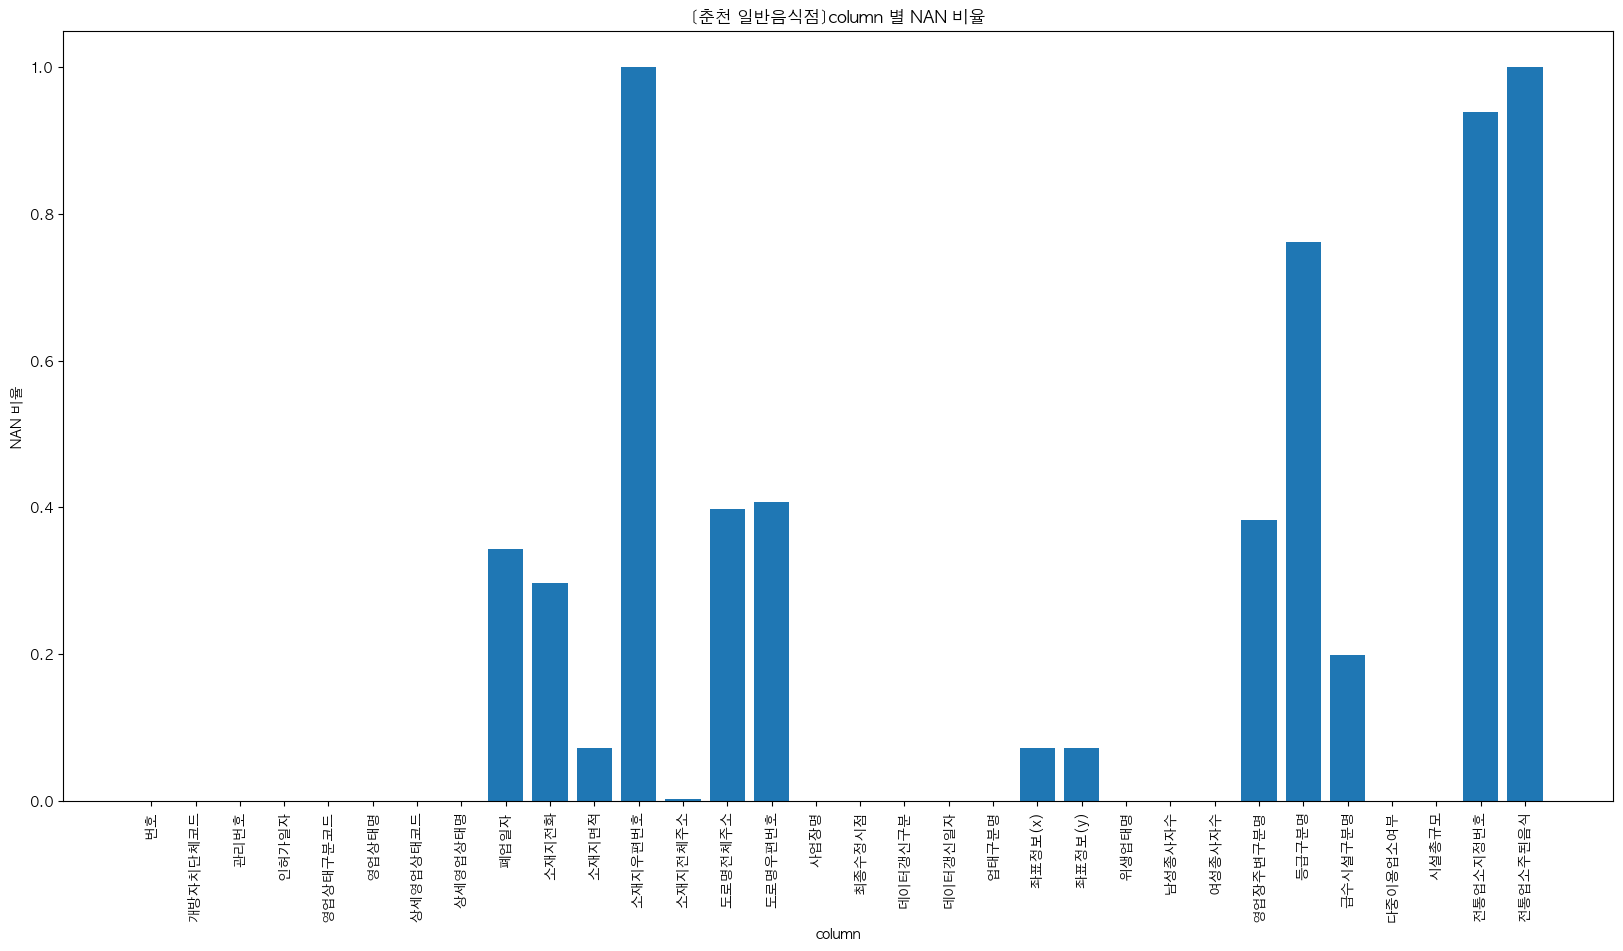

In [52]:
# column 별 NAN 개수
df.isna().sum()

# column 별 NAN 비율
df.isna().sum() / df.shape[0]

# NAN비율 시각화

plt.rc('font', family='AppleGothic')
plt.figure(figsize=(20, 10))
plt.bar(df.columns, df.isna().sum() / df.shape[0])
plt.xticks(rotation=90)
plt.xlabel('column')
plt.ylabel('NAN 비율')
plt.title('[춘천 일반음식점]column 별 NAN 비율')
# 폰트 설정(애플고딕)
plt.show()

In [56]:
df['영업상태구분코드'].value_counts()

영업상태구분코드
3    60755
1    31686
Name: count, dtype: int64

In [58]:
df['폐업일자'].nunique()

7594

In [ ]:
# df의 특정 column 선택한 df 생성
df2 = df[['번호', '인허가일자', '영업상태구분코드', '소재지전체주소', '도로명전체주소', '사업장명', '최종수정시점']]